<a href="https://colab.research.google.com/github/IbraSuraya/Semester3/blob/main/CNN_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

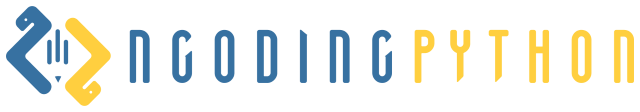

# CNN Tutorial
### by [NgodingPython](http://youtube.com/NgodingPython)

## Setup Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
% cd /content/gdrive/My Drive/cv_workshop

/content/gdrive/.shortcut-targets-by-id/1IAj9sMph-gTN-Mw0balHLZA5QQ2XOmwZ/cv_workshop


## Eksplorasi Data

In [ ]:
import os

# Eksplorasi direktori dataset
for dirpath, dirnames, filenames in os.walk("data/deep_learning"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'data/deep_learning'.
There are 4 directories and 0 images in 'data/deep_learning/test'.
There are 0 directories and 10 images in 'data/deep_learning/test/dorami'.
There are 0 directories and 10 images in 'data/deep_learning/test/pikachu'.
There are 0 directories and 10 images in 'data/deep_learning/test/spongebob'.
There are 0 directories and 10 images in 'data/deep_learning/test/tweety'.
There are 4 directories and 0 images in 'data/deep_learning/train'.
There are 0 directories and 145 images in 'data/deep_learning/train/pikachu'.
There are 0 directories and 281 images in 'data/deep_learning/train/tweety'.
There are 0 directories and 156 images in 'data/deep_learning/train/spongebob'.
There are 0 directories and 142 images in 'data/deep_learning/train/dorami'.


In [ ]:
# Dapatkan label data
import pathlib
import numpy as np
data_dir = pathlib.Path("data/deep_learning/train") 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
print(class_names)

['dorami' 'pikachu' 'spongebob' 'tweety']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  # Ambil sembarang gambar
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

Image shape: (452, 865, 3)


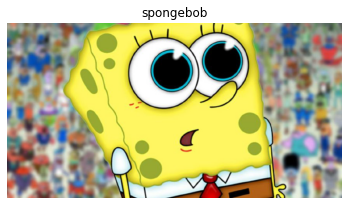

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="data/deep_learning/train/",
                        target_class="spongebob")

## Model 1 : CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set directory data
train_dir = "data/deep_learning/train/"
test_dir = "data/deep_learning/test/"

# Set data generator
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

# Buat CNN Model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3,
                         activation="relu", 
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(4, activation="softmax") 
])

# Compile model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Latih model
history_1 = model_1.fit(train_data,
                        epochs=30,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 724 images belonging to 4 classes.
Found 40 images belonging to 4 classes.
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


23/23 [==============================] - 165s 6s/step - loss: 1.3657 - accuracy: 0.3854 - val_loss: 1.2597 - val_accuracy: 0.3250
Epoch 2/30
23/23 [==============================] - 12s 515ms/step - loss: 1.1301 - accuracy: 0.5359 - val_loss: 1.1862 - val_accuracy: 0.3750
Epoch 3/30
23/23 [==============================] - 12s 526ms/step - loss: 0.8278 - accuracy: 0.6782 - val_loss: 1.1896 - val_accuracy: 0.4500
Epoch 4/30
23/23 [==============================] - 12s 510ms/step - loss: 0.6053 - accuracy: 0.7707 - val_loss: 1.0484 - val_accuracy: 0.5250
Epoch 5/30
23/23 [==============================] - 12s 513ms/step - loss: 0.4539 - accuracy: 0.8453 - val_loss: 0.6543 - val_accuracy: 0.8000
Epoch 6/30
23/23 [==============================] - 12s 517ms/step - loss: 0.2900 - accuracy: 0.8909 - val_loss: 0.7453 - val_accuracy: 0.7500
Epoch 7/30
23/23 [==============================] - 12s 513ms/step - loss: 0.1956 - accuracy: 0.9309 - val_loss: 0.8882 - val_accuracy: 0.7000
Epoch 8/30
2

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

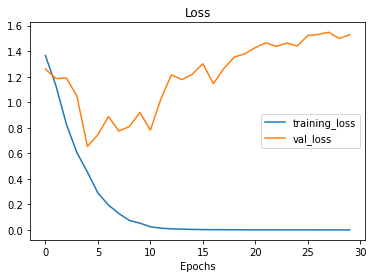

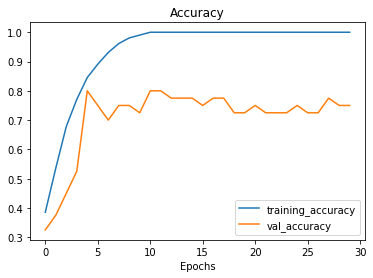

In [ ]:
plot_loss_curves(history_1)

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

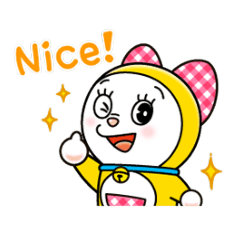

In [ ]:
new_img = mpimg.imread("dorami.png")
plt.imshow(new_img)
plt.axis(False);

## Model 2 : CNN + Augmentasi

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data generator dengan augmentasi
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.) 

test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Set directory data
train_dir = "data/deep_learning/train/"
test_dir = "data/deep_learning/test/"

In [ ]:
# Augmentasi data
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical',
                                                                   shuffle=False)

# non-augmented data
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=False)

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Augmented training images:
Found 724 images belonging to 4 classes.
Non-augmented training images:
Found 724 images belonging to 4 classes.
Unchanged test images:
Found 40 images belonging to 4 classes.


In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


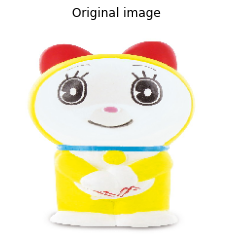

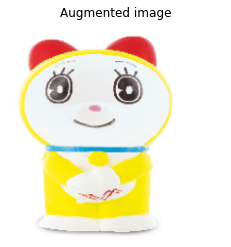

In [ ]:
# Original vs Augmented
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(4, activation='softmax')
])

# Compile the model
model_2.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/10
23/23 [==============================] - 21s 819ms/step - loss: 1.5724 - accuracy: 0.3122 - val_loss: 1.4350 - val_accuracy: 0.2500
Epoch 2/10
23/23 [==============================] - 19s 837ms/step - loss: 1.4048 - accuracy: 0.3867 - val_loss: 1.3978 - val_accuracy: 0.2750
Epoch 3/10
23/23 [==============================] - 19s 827ms/step - loss: 1.3979 - accuracy: 0.2514 - val_loss: 1.3916 - val_accuracy: 0.2000
Epoch 4/10
 9/23 [==========>...................] - ETA: 11s - loss: 1.3779 - accuracy: 0.3160

In [ ]:
plot_loss_curves(history_2)

In [ ]:
# prediksi
from google.colab import files
files.upload()

In [ ]:
new_img = mpimg.imread("dorami.png")
plt.imshow(new_img)
plt.axis(False);

In [ ]:
new_img = load_and_prep_image("dorami.png")
new_img

In [ ]:
print(f"Ukuran gambar awal: {new_img.shape}")
new_img = tf.expand_dims(new_img, axis=0) 
print(f"Shape after new dimension: {new_img.shape}")
new_img

In [ ]:
pred = model_2.predict(new_img)
pred

## Model 3 : CNN + Pretrained Model

In [ ]:
import tensorflow as tf
base_model = tf.keras.applications.resnet_v2.ResNet50V2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
base_model.trainable = False

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, BatchNormalization, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(4)
softmax = Activation('softmax')

inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
outputs = softmax(outputs)

model = tf.keras.Model(inputs, outputs)

model.compile(loss="categorical_crossentropy",
                optimizer="rmsprop",
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_data,
                        epochs=30,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
plot_loss_curves(history)

In [ ]:
train_data.class_indices

In [ ]:
pred = model.predict(new_img)
pred.argmax(axis=1)